In [163]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

In [177]:
# Объединение 2 массивов в DataFrame
df = pd.DataFrame({
    'petersburg': [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105, np.nan],
    'magadan': [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
})

### Установка уровня значимости ###

In [165]:
alpha = 0.05

### Проверка данных на нормальность ###

In [166]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

Тест Шапиро-Уилка

In [167]:
_, p = shapiro(df['petersburg'].dropna())
print('p=%.3f' % p)

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.242
Данные распределены нормально


In [168]:
_, p = shapiro(df['magadan'])
print('p=%.3f' % p)

# Интерпретация
if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.036
Данные не распределены нормально (мы отвергаем H0)


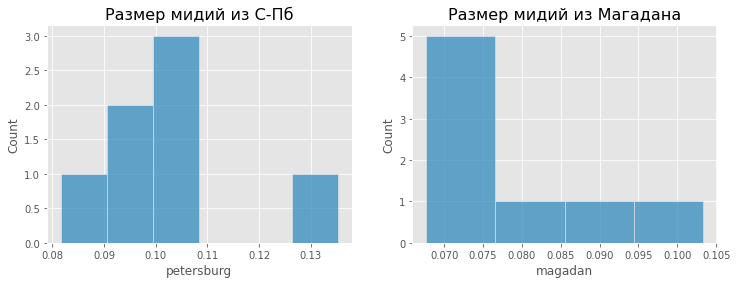

In [169]:
# Дополнительная проверка на нормальность данных при помощи визуализации
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(df, x='petersburg', ax=axes[0])
axes[0].set_title('Размер мидий из С-Пб', fontsize=16)

sns.histplot(df, x='magadan', ax=axes[1])
axes[1].set_title('Размер мидий из Магадана', fontsize=16);

В связи с тем, что данные (в общем итоге) не распределены нормально (согласно проведенным тестам и графикам распределений данные о размере раковин мидий, выращенных в Магадане, - негауссовские), выбираем тест на корреляцию Спирмена

### Тест на наличие корреляции (корреляция Спирмена) ###

In [171]:
# Для проведения теста на корреляцию заменим значение NaN для признака petersburg 
# в датафрейме с мидиями на медианное значение данного признака
df['petersburg'] = df['petersburg'].fillna(df['petersburg'].median())

In [172]:
corr, p = spearmanr(df['petersburg'], df['magadan'])
print('corr=%.3f' % corr, 'p=%.3f' % p, sep='\n')

corr=0.156
p=0.713


In [178]:
H0 = 'Нет зависимости между размерами раковин мидий, выращенных в разных городах'
Ha = 'Есть зависимость между размерами раковин мидий, выращенных в разных городах'

In [173]:
if p>alpha:
    print(f"{'p=%.3f' % p} > {alpha}. \nМы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{'p=%.3f' % p} <= {alpha}. \nМы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

p=0.713 > 0.05. 
Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.


Вывод: согласно соотношению величин p-value (~71%) и статистической значимости (5%), отвергнуть нулевую гипотезу о том, что между размерами раковин мидий, выращенных в С-Пб и Магадане отсутствует зависимость, невозможно. Данный вывод также подтверждает значение коэффициента корреляции для рассматриваемых показателей (0.156).    
Т.о., между размерами раковин мидий, выращенных в разных городах, зависимость отсутствует.

### Тест на сравнение выборок ###

Т.к. признак magadan рассматриваемого датасета распределен ненормально, используем непараметрический тест на сравнение выборок. Зависимой переменной является размер раковины мидий. Зависимая переменная - количественная. Сравниваются 2 независиые выборки (из разных совокупностей).     
Следовательно, в целях определения разницы в среднем размере мидии в зависимости от города-производителя необходимо использовать критерий Уилкоксона.

Критерий Уилкоксона

In [174]:
H0 = 'Нет значимой разницы между размерами раковин мидий'
Ha = 'Есть значимая разница между размерами раковин мидий'

In [175]:
# В связи с тем, что для проведения сравнительного теста размер выборок должен быть одинаковый, оставляем изначально пустое значения для 
# признака petersburg замененным на медианное значение. Не рассматривать его вовсе при проведения теста (код test_results = wilcoxon(df['petersburg'].dropna, df['magadan']))
# приводмит к аналогичной ошибке, связанной с размерностью выборок.

test_results = wilcoxon(df['petersburg'], df['magadan'])

p = round(test_results[1],3)

if p>alpha:
    print(f"{p} > {alpha}. \nМы не можем отвергнуть нулевую гипотезу. {H0}")
else:
    print(f"{p} <= {alpha}. \nМы отвергаем нулевую гипотезу. {Ha}")

0.023 <= 0.05. 
Мы отвергаем нулевую гипотезу. Есть значимая разница между размерами раковин мидий


Для проверки вывода, сделанного по результатам выполненного выше сравнительного теста, проведем тест Манна-Уитни, используемый для сравнения различий между двумя выборками, когда распределение выборки не является нормальным, а размеры выборки малы (n < 30).

Критерий Манна-Уитни

In [176]:
from scipy.stats import mannwhitneyu

test_results = mannwhitneyu(df['petersburg'], df['magadan'])

p = round(test_results[1],3)

if p>alpha:
    print(f"{p} > {alpha}. \nМы не можем отвергнуть нулевую гипотезу. {H0}")
else:
    print(f"{p} <= {alpha}. \nМы отвергаем нулевую гипотезу. {Ha}")


0.007 <= 0.05. 
Мы отвергаем нулевую гипотезу. Есть значимая разница между размерами раковин мидий


Несмотря на различные величины p-value, полученные по результатам теста Уилкоксона и теста Манна-Уитни, вывод о том, что разница между размерами раковин мидий, выращенных в С-Пб и Магадане, однозначно верен, т.е. нулевую гипотезу, утверждающую обратное, отвергаем.